In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv("../dados/airbnb.csv", index_col=0)
df.country = df.country.str.strip()
# List of most frequent countries (replace with your actual list)
most_frequent_countries = ['India', 'Italy', 'Greece', 'Thailand', 'France', 'Turkey', 'Georgia', 'Morocco', 'Japan', 'United Kingdom']

# Use numpy.where for conditional replacement
df['country'] = np.where(
    df['country'].isin(most_frequent_countries),  # Condition
    df['country'],                               # Value if True
    'Outros'                                      # Value if False
)
df_dummies = pd.get_dummies(df.country) 
df = pd.concat([df, df_dummies], axis = 1)
df.rename(columns={"hourse_rules": "house_rules", "toiles": "toilet"}, inplace=True)
colunas = ["host_id", "host_name", "house_rules", "img_links", "safety_rules", "checkin", "checkout", "name", "features", "address", "country"]
df = df.drop(columns = colunas)
# pd.get_dummies(df.country) 
df.rating = df.rating.replace("New", "-1").astype(float)
df.reviews = df.reviews.str.replace(",", "").astype(int)
z_scores = stats.zscore(df['price'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12652 entries, 0 to 12804
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              12652 non-null  int64  
 1   rating          12652 non-null  float64
 2   reviews         12652 non-null  int32  
 3   price           12652 non-null  int64  
 4   bathrooms       12652 non-null  int64  
 5   beds            12652 non-null  int64  
 6   guests          12652 non-null  int64  
 7   toilet          12652 non-null  int64  
 8   bedrooms        12652 non-null  int64  
 9   studios         12652 non-null  int64  
 10  France          12652 non-null  uint8  
 11  Georgia         12652 non-null  uint8  
 12  Greece          12652 non-null  uint8  
 13  India           12652 non-null  uint8  
 14  Italy           12652 non-null  uint8  
 15  Japan           12652 non-null  uint8  
 16  Morocco         12652 non-null  uint8  
 17  Outros          12652 non-null 

In [11]:
df = df.drop("amenities", axis=1)

In [13]:
df.to_csv("../dados/airbnb-feature-eng.csv", index = False)

In [3]:
def transformar_em_lista(texto):
  """Converte uma string com elementos separados por vírgulas em uma lista."""
  return [f'{element.strip()}' for element in texto.split(',')]
df['amenities_list'] = df['amenities'].apply(transformar_em_lista)
df['amenities_list'].head(3)

0    [Mountain view, Valley view, Lake access, Kitc...
1    [Kitchen, Wifi, Dedicated workspace, Free park...
2    [Mountain view, Kitchen, Wifi, Dedicated works...
Name: amenities_list, dtype: object

In [4]:
import pandas as pd

def explode_column(df, column_to_explode):
  """
  Explodes a DataFrame column containing lists into multiple rows.

  Args:
    df: The pandas DataFrame.
    column_to_explode: The name of the column containing lists.

  Returns:
    The exploded DataFrame.
  """
  # Create a series from the column to explode, where each element is a list
  exploded = df[column_to_explode].explode()

  # Reset the index of the exploded series to use numeric indices
  exploded = exploded.reset_index()

  # Get a list of all column names in the original dataframe except for the column that was exploded
  columns_to_repeat = [col for col in df.columns if col != column_to_explode]
  
  # Create a new dataframe by selecting the columns to repeat and merging it with the exploded series on the index
  exploded_df = df[columns_to_repeat].merge(exploded, how="left", left_index=True, right_on="index")
  
  # Remove the index column, since it's no longer needed after the merge
  exploded_df = exploded_df.drop(columns="index")
  
  return exploded_df


In [5]:
explode_column(df, "amenities_list")

,id,rating,reviews,amenities,price,bathrooms,beds,guests,toilet,bedrooms,...,Greece,India,Italy,Japan,Morocco,Outros,Thailand,Turkey,United Kingdom,amenities_list
0,49849504,4.71,64,"Mountain view,Valley view,Lake access,Kitchen,...",8078,1,1,2,0,2,...,0,0,0,0,0,0,0,1,0,Mountain view
1,49849504,4.71,64,"Mountain view,Valley view,Lake access,Kitchen,...",8078,1,1,2,0,2,...,0,0,0,0,0,0,0,1,0,Valley view
2,49849504,4.71,64,"Mountain view,Valley view,Lake access,Kitchen,...",8078,1,1,2,0,2,...,0,0,0,0,0,0,0,1,0,Lake access
3,49849504,4.71,64,"Mountain view,Valley view,Lake access,Kitchen,...",8078,1,1,2,0,2,...,0,0,0,0,0,0,0,1,0,Kitchen
4,49849504,4.71,64,"Mountain view,Valley view,Lake access,Kitchen,...",8078,1,1,2,0,2,...,0,0,0,0,0,0,0,1,0,Wifi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121389,40547903,4.85,13,"Sea view,Beach access – Beachfront,Kitchen,Wif...",9909,1,2,5,0,1,...,0,0,0,1,0,0,0,0,0,Free parking on premises
121390,40547903,4.85,13,"Sea view,Beach access – Beachfront,Kitchen,Wif...",9909,1,2,5,0,1,...,0,0,0,1,0,0,0,0,0,TV
121391,40547903,4.85,13,"Sea view,Beach access – Beachfront,Kitchen,Wif...",9909,1,2,5,0,1,...,0,0,0,1,0,0,0,0,0,Free washer – In building
121392,40547903,4.85,13,"Sea view,Beach access – Beachfront,Kitchen,Wif...",9909,1,2,5,0,1,...,0,0,0,1,0,0,0,0,0,Security cameras on property


In [6]:
df_explode = explode_column(df, "amenities_list")

In [7]:
df_explode.amenities_list.value_counts()[:30].index

Index(['Unavailable: Carbon monoxide alarmCarbon monoxide alarm', 'Wifi',
       'Kitchen', 'Free parking on premises',
       'Unavailable: Smoke alarmSmoke alarm', 'Pets allowed', 'TV',
       'Air conditioning', 'Dedicated workspace', 'Washing machine',
       'Long-term stays allowed', 'Hair dryer', 'Security cameras on property',
       'Patio or balcony', 'Garden', 'Luggage drop-off allowed', 'Garden view',
       'Private patio or balcony', 'Refrigerator', 'Mountain view', 'Dryer',
       'TV with standard cable/satellite', 'Pool', 'Breakfast',
       'Smoking allowed', 'Indoor fireplace', 'Bath',
       'Beach access – Beachfront', 'Free on-street parking', 'Private pool'],
      dtype='object')

In [8]:
top_30_amenities = df_explode.amenities_list.value_counts()[:30].index
df_top_30_amenities = df_explode[df_explode.amenities_list.isin(top_30_amenities)][["id", "amenities_list"]]
df_top_30_amenities

,id,amenities_list
0,49849504,Mountain view
3,49849504,Kitchen
4,49849504,Wifi
5,49849504,Free parking on premises
6,49849504,Pets allowed
...,...,...
121388,40547903,Dedicated workspace
121389,40547903,Free parking on premises
121390,40547903,TV
121392,40547903,Security cameras on property


In [9]:
df_explode[df_explode.amenities_list == "Wifi"]

,id,rating,reviews,amenities,price,bathrooms,beds,guests,toilet,bedrooms,...,Greece,India,Italy,Japan,Morocco,Outros,Thailand,Turkey,United Kingdom,amenities_list
4,49849504,4.71,64,"Mountain view,Valley view,Lake access,Kitchen,...",8078,1,1,2,0,2,...,0,0,0,0,0,0,0,1,0,Wifi
11,50891766,-1.00,0,"Kitchen,Wifi,Dedicated workspace,Free parking ...",4665,2,2,4,0,2,...,0,0,0,0,0,0,0,1,0,Wifi
22,50699164,4.85,68,"Mountain view,Kitchen,Wifi,Dedicated workspace...",5991,1,3,4,0,1,...,0,0,0,0,0,0,0,0,0,Wifi
33,49871422,5.00,13,"Mountain view,Valley view,Kitchen,Wifi,Free pa...",11339,1,2,4,0,1,...,0,0,0,0,0,0,0,1,0,Wifi
41,51245886,-1.00,0,"Kitchen,Wifi,Free parking on premises,TV,Air c...",6673,1,1,2,0,1,...,0,0,0,0,0,0,0,1,0,Wifi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121352,44697740,4.94,16,"Kitchen,Wifi,Free parking on premises,Private ...",4288,8,0,4,0,0,...,0,0,0,0,0,1,0,0,0,Wifi
121361,29975283,4.67,6,"Wifi,Free on-street parking,Air conditioning,G...",15200,0,1,2,1,1,...,0,0,0,0,0,1,0,0,0,Wifi
121369,32977697,4.67,3,"Wifi,Breakfast,Long-term stays allowed,Unavail...",9103,1,2,2,0,1,...,0,0,0,0,0,1,0,0,0,Wifi
121375,8006146,4.86,7,"Kitchen,Wifi,Dedicated workspace,Free parking ...",42262,2,4,8,0,2,...,0,0,0,0,0,1,0,0,0,Wifi


In [10]:
df_com_wifi = df_explode[df_explode.amenities_list == "Wifi"][["price", "amenities_list", "id"]]

In [11]:
df_com_wifi

,price,amenities_list,id
4,8078,Wifi,49849504
11,4665,Wifi,50891766
22,5991,Wifi,50699164
33,11339,Wifi,49871422
41,6673,Wifi,51245886
...,...,...,...
121352,4288,Wifi,44697740
121361,15200,Wifi,29975283
121369,9103,Wifi,32977697
121375,42262,Wifi,8006146


In [12]:
com_wifi = df_com_wifi.id.unique()

In [13]:
df_sem_wifi = df_explode[~df_explode.id.isin(com_wifi)][["price", "id"]]
df_sem_wifi = df_sem_wifi.drop_duplicates()
df_sem_wifi["amenities_list"] = "No-Wifi"
df_sem_wifi

,price,id,amenities_list
97,9052,50425621,No-Wifi
136,3763,48325030,No-Wifi
146,22758,620245309297447077,No-Wifi
187,2747,48684568,No-Wifi
195,6827,45231237,No-Wifi
...,...,...,...
121114,25309,614428833932294155,No-Wifi
121134,13573,50358163,No-Wifi
121221,3490,621278037552014887,No-Wifi
121250,3864,624406715458043020,No-Wifi


In [14]:
df_wifi_all = pd.concat([df_com_wifi, df_sem_wifi])

In [15]:
df_wifi_all.groupby("amenities_list").describe()

price                                                      \
                 count          mean           std    min      25%     50%   
amenities_list                                                               
No-Wifi         2982.0  10955.399732  13925.401778  669.0  3900.75  7185.5   
Wifi            9670.0  14982.717477  19871.196956  393.0  3994.00  8312.0   

                                        id                              \
                     75%       max   count          mean           std   
amenities_list                                                           
No-Wifi         12957.00  154137.0  2982.0  9.190544e+16  2.184468e+17   
Wifi            16719.75  154634.0  9670.0  6.983324e+16  1.944681e+17   

                                                                             
                    min          25%         50%          75%           max  
amenities_list                                                               
No-Wifi         65773.0  22984602.75  39414423.0  51026326.75  6.895649e+17  
Wifi            13131.0  19647476.50  35959986.5  49494784.25  7.017905e+17

<Axes: xlabel='amenities_list', ylabel='price'>

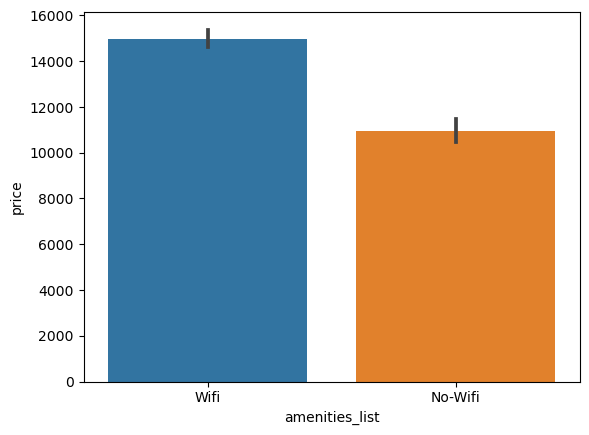

In [16]:
sns.barplot(df_wifi_all[["amenities_list", "price"]], x="amenities_list", y="price")

<Axes: xlabel='amenities_list', ylabel='price'>

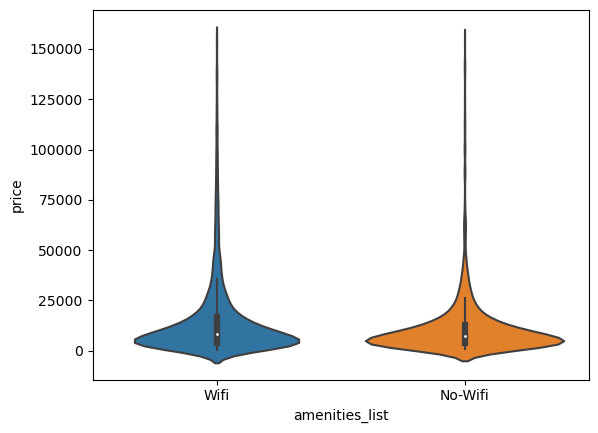

In [17]:
sns.violinplot(df_wifi_all[["amenities_list", "price"]], x="amenities_list", y="price")

In [18]:
#revisar os codigos
#criar variaveis 

In [19]:
#desestruturar a coluna amenities e criar uma nova Series contendo todas as strings individuais
amenities_exploded = df['amenities_list'].explode()
amenities_exploded

0                                            Mountain view
0                                              Valley view
0                                              Lake access
0                                                  Kitchen
0                                                     Wifi
                               ...                        
12804                             Free parking on premises
12804                                                   TV
12804                            Free washer – In building
12804                         Security cameras on property
12804    Unavailable: Carbon monoxide alarmCarbon monox...
Name: amenities_list, Length: 121394, dtype: object

In [20]:
amenities_exploded.value_counts()

Unavailable: Carbon monoxide alarmCarbon monoxide alarm    10033
Wifi                                                        9670
Kitchen                                                     9435
Free parking on premises                                    9314
Unavailable: Smoke alarmSmoke alarm                         7881
                                                           ...  
Fast wifi – 205 Mbps                                           1
29" HDTV with standard cable/satellite                         1
Fast wifi – 132 Mbps                                           1
Ruime koelkast met vriesvak refrigerator                       1
44" HDTV with Netflix                                          1
Name: amenities_list, Length: 794, dtype: int64

In [21]:
# Calcular o preço medio de airbnb com e sem wifi (usar o exploded no df airbnb)

In [22]:
#criar uma nova lista com valores únicos
unique_amenities = list(amenities_exploded.unique())
unique_amenities

['Mountain view',
 'Valley view',
 'Lake access',
 'Kitchen',
 'Wifi',
 'Free parking on premises',
 'Pets allowed',
 'TV',
 'Unavailable: Carbon monoxide alarmCarbon monoxide alarm',
 'Unavailable: Smoke alarmSmoke alarm',
 'Dedicated workspace',
 'Private pool',
 'Private hot tub',
 'Washing machine',
 'Free driveway parking on premises',
 '40" HDTV with cable/satellite TV',
 'Lift',
 '42" HDTV with Netflix',
 'Security cameras on property',
 'Air conditioning',
 'Long-term stays allowed',
 'Lake view',
 'Waterfront',
 'HDTV with Netflix',
 'Garden view',
 'Pool',
 'Indoor fireplace',
 'Hair dryer',
 'Fire pit',
 'Dryer',
 'Breakfast',
 'Free on-street parking',
 'Central air conditioning',
 'Shared patio or balcony',
 '쿠잉 115L 레트로 refrigerator',
 'Microwave',
 'Private patio or balcony',
 'Private backyard – Fully fenced',
 'Private outdoor pool',
 'Refrigerator',
 'Free driveway parking on premises – 3 spaces',
 'Luggage drop-off allowed',
 'Courtyard view',
 'Public or shared beac

In [23]:
unique_amenities = sorted(unique_amenities)
unique_amenities

['100" HDTV with Amazon Prime Video',
 '100" TV',
 '100" TV with Chromecast',
 '100" TV with Netflix',
 '101" HDTV with HBO Max',
 '107" HDTV with standard cable/satellite',
 '108" HDTV with standard cable/satellite',
 '12" TV with Amazon Prime Video',
 '12" TV with Netflix',
 '12" TV with standard cable/satellite',
 '12v cool box refrigerator',
 '14" HDTV with cable/satellite TV',
 '14" TV',
 '15" TV',
 '15" TV with standard cable/satellite',
 '16" TV',
 '165" HDTV with cable/satellite TV',
 '17" TV',
 '17" TV with standard cable/satellite',
 '18" TV with standard cable/satellite',
 '19" HDTV',
 '19" HDTV with Amazon Prime Video',
 '19" HDTV with standard cable/satellite',
 '19" TV',
 '2" TV with standard cable/satellite',
 '20" HDTV with Netflix',
 '20" HDTV with standard cable/satellite',
 '20" TV',
 '20" TV with standard cable/satellite',
 '200" TV with Fire TV',
 '21" HDTV',
 '21" HDTV with Chromecast',
 '21" HDTV with standard cable/satellite',
 '21" TV',
 '21" TV with standard c

In [24]:
#Próximos passos:

#Agrupar amenidades semelhantes (seria uma boa ideia criar um dicionario ou tem outra forma melhor?)
#Substituir linha a linha os nomes das amenidades pelo grupo dela

#Criar dummies (dúvida: como criar dummies a partir de uma lista de strings?)

In [25]:
#codigo que pode ser util porque usa o replace
#import re
#amenidades = df["amenities"]
#amenidades = amenidades.str.strip()
#amenidades = amenidades.str.replace(",", ", ", regex=True)
#amenidades = amenidades.str.replace("/", " ", regex=True)

In [26]:
#from sklearn.preprocessing import LabelEncoder
#unique_amenities = []
#for amenities in df["amenities"]:
#    unique_amenities.extend(amenities)
#unique_amenities = list(set(unique_amenities))
#encoder = LabelEncoder()
#encoder.fit(unique_amenities)
